In [0]:
# install Hugging Face Libraries
%pip install  git+https://github.com/huggingface/peft.git
# install Hugging Face Libraries
%pip install  bitsandbytes

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-_6i8n1c9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-_6i8n1c9
  Resolved https://github.com/huggingface/peft.git to commit 0b62b4378b4ce9367932c73540349da9a41bdea8
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached safetensors-0.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Created wheel for peft: filename=peft-0.4.0.dev0-py3-none-any.whl size=61643 sha256=9199d834d04540271b556c347a6a7a03720936cc9ff391a070cf89c0ee585f87
  Stored

In [0]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModelForVision2Seq, AutoProcessor

from peft import LoraConfig, get_peft_model


# Let's define the LoraConfig
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q", "v", "q_proj", "v_proj"]
)


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /local_disk0/.ephemeral_nfs/envs/pythonEnv-96f8432f-d6f8-4153-a099-7e24f779ba3b/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /local_disk0/.ephemeral_nfs/envs/pythonEnv-96f8432f-d6f8-4153-a099-7e24f779ba3b/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/local_disk0/.ephemeral_nfs/envs/pythonEnv-96f8432f-d6f8-4153-a099-7e24f779ba3b/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-96f8432f-d6f8-4153-a099-7e24f779ba3b/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('/usr/lib/x86_64-linux-gnu/jni'), PosixPath('gc -Xss4m -Djava.library.path=/usr/java/packages/lib/amd64'), PosixPath(' -Djava.io.tmpdir=/local_disk0/tmp -XX'), PosixPath('PerMethodRecompilationCutoff=-1 -XX'), PosixPath('+UseCodeCacheFlushing -XX'), PosixPath('-UseContainerSupport -XX'), PosixPath('/usr/lib/jni -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryI

In [0]:
model_id = "Salesforce/blip2-flan-t5-xl"
# We load our model and processor using `transformers`
model = AutoModelForVision2Seq.from_pretrained(model_id, load_in_8bit=True,device_map='auto')
processor = AutoProcessor.from_pretrained(model_id)

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [0]:
from datasets import load_dataset
fashion_dir = '/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_images/'
dataset = load_dataset("imagefolder", data_dir=fashion_dir, split="train")

/databricks/python_shell/dbruntime/huggingface_patches/datasets.py:26: UserWarning: This dataset can not be stored in DBFS because either `cache_dir` or the environment variable `HF_DATASETS_CACHE` is set to a non-DBFS path. If this cluster restarts, all saved dataset information will be lost.
  warnings.warn(
/databricks/python_shell/dbruntime/huggingface_patches/datasets.py:13: UserWarning: During large dataset downloads, there could be multiple progress bar widgets that can cause performance issues for your notebook or browser. To avoid these issues, use `datasets.utils.logging.disable_progress_bar()` to turn off the progress bars.
  warnings.warn(


Resolving data files:   0%|          | 0/801 [00:00<?, ?it/s]

Computing checksums:  25%|##4       | 200/801 [00:05<00:15, 39.99it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-3fa469ee1568add7/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


In [0]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 800
})

In [0]:
dataset = dataset.shuffle(seed=42).shuffle(seed=24)

In [0]:
dataset[100]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=768x768>,
 'text': '\nStylish white trousers are a versatile garment that can be dressed up or down. They are typically made of high-quality fabrics like wool, cotton or linen, and feature intricate details like pleats, cuffed hems, and decorative buttons. They are a comfortable and elegant choice for both formal'}

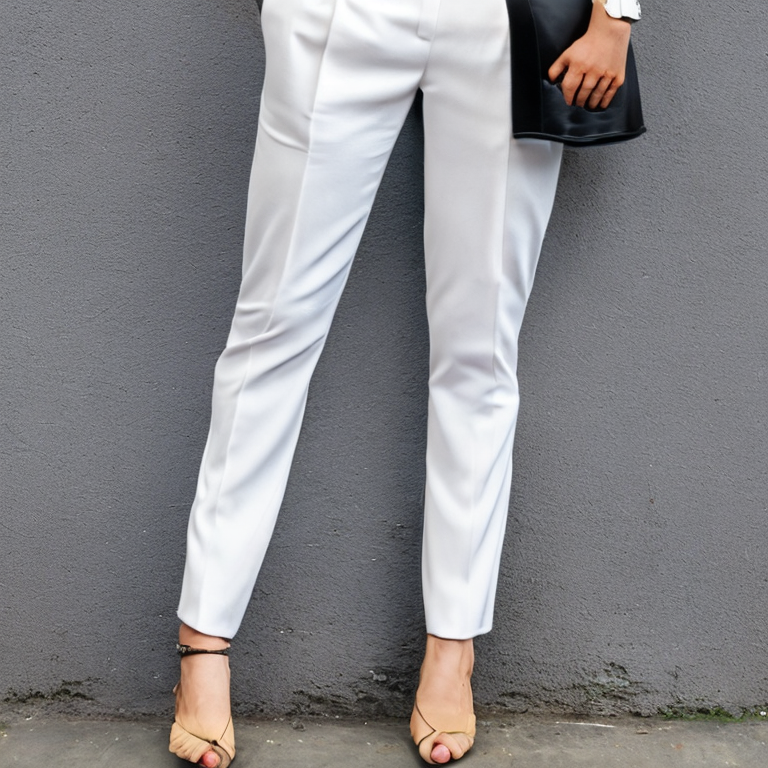

In [0]:
from PIL import Image
display(dataset[100]['image'])

In [0]:
# Get our peft model and print the number of trainable parameters
model = get_peft_model(model, config)
model.print_trainable_parameters()

trainable params: 12,951,552 || all params: 3,955,398,144 || trainable%: 0.3274399068939847


In [0]:
class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding["text"] = item["text"]
        return encoding


def collator(batch):
    # pad the input_ids and attention_mask
    processed_batch = {}
    for key in batch[0].keys():
        if key != "text":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor.tokenizer(
                [example["text"] for example in batch], padding=True, return_tensors="pt"
            )
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch


In [0]:
train_dataset = ImageCaptioningDataset(dataset, processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=4, collate_fn=collator)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

#Do not bother doing this without a GPU. It will be excrutiatingly slow and resource intensive
device = "cuda"# if torch.cuda.is_available() else "cpu"

In [0]:
#model_save_dir = '/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model_10_epoch/'
model_save_dir = '/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model_30_epoch/'

In [0]:
model.train()

for epoch in range(30):
    print("Epoch:", epoch)
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device, torch.float16)

        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=input_ids)

        loss = outputs.loss

        print("Loss:", loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
    model.save_pretrained(model_save_dir+str(epoch))



Epoch: 0
Loss: 5.57421875
Loss: 1.9404296875
Loss: 10.7734375
Loss: 6.2734375
Loss: 21.171875
Loss: 16.28125
Loss: 13.2109375
Loss: 9.171875
Loss: 18.390625
Loss: 18.21875
Loss: 21.46875
Loss: 4.41796875
Loss: 5.4921875
Loss: 13.6484375
Loss: 6.24609375
Loss: 21.625
Loss: 17.203125
Loss: 8.21875
Loss: 12.34375
Loss: 6.65234375
Loss: 2.59765625
Loss: 10.78125
Loss: 18.625
Loss: 2.439453125
Loss: 16.109375
Loss: 7.45703125
Loss: 4.69140625
Loss: 8.3984375
Loss: 12.546875
Loss: 7.48828125
Loss: 4.37890625
Loss: 4.4375
Loss: 6.2265625
Loss: 8.0078125
Loss: 7.58984375
Loss: 11.6640625
Loss: 10.0546875
Loss: 4.828125
Loss: 2.84375
Loss: 3.6796875
Loss: 12.953125
Loss: 4.90625
Loss: 12.21875
Loss: 2.24609375
Loss: 8.5390625
Loss: 10.03125
Loss: 5.08984375
Loss: 5.453125
Loss: 2.560546875
Loss: 8.2890625
Loss: 12.546875
Loss: 14.4921875
Loss: 5.01953125
Loss: 13.71875
Loss: 12.7421875
Loss: 9.421875
Loss: 4.390625
Loss: 4.7890625
Loss: 9.03125
Loss: 17.578125
Loss: 2.35546875
Loss: 8.6953125
L

In [0]:
processor.save_pretrained('/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model_30_epoch/processor/')

In [0]:
#epoch2_loc = '/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model/1'

In [0]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel, PeftConfig


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /local_disk0/.ephemeral_nfs/envs/pythonEnv-bf841a42-656b-46a9-b675-2982c2da78e0/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /local_disk0/.ephemeral_nfs/envs/pythonEnv-bf841a42-656b-46a9-b675-2982c2da78e0/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/local_disk0/.ephemeral_nfs/envs/pythonEnv-bf841a42-656b-46a9-b675-2982c2da78e0/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-bf841a42-656b-46a9-b675-2982c2da78e0/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('/usr/lib/x86_64-linux-gnu/jni'), PosixPath('gc -Xss4m -Djava.library.path=/usr/java/packages/lib/amd64'), PosixPath(' -Djava.io.tmpdir=/local_disk0/tmp -XX'), PosixPath('PerMethodRecompilationCutoff=-1 -XX'), PosixPath('+UseCodeCacheFlushing -XX'), PosixPath('-UseContainerSupport -XX'), PosixPath('/usr/lib/jni -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryI

In [0]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModelForVision2Seq, AutoProcessor

from peft import LoraConfig, get_peft_model
model_id = "Salesforce/blip2-flan-t5-xl"

# We load our model and processor using `transformers`
model = AutoModelForVision2Seq.from_pretrained(model_id, load_in_8bit=True,device_map='auto')
processor = AutoProcessor.from_pretrained('/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model_10_epoch/processor/')

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [0]:
model_finetuned = PeftModel.from_pretrained(model, '/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model_30_epoch/29')


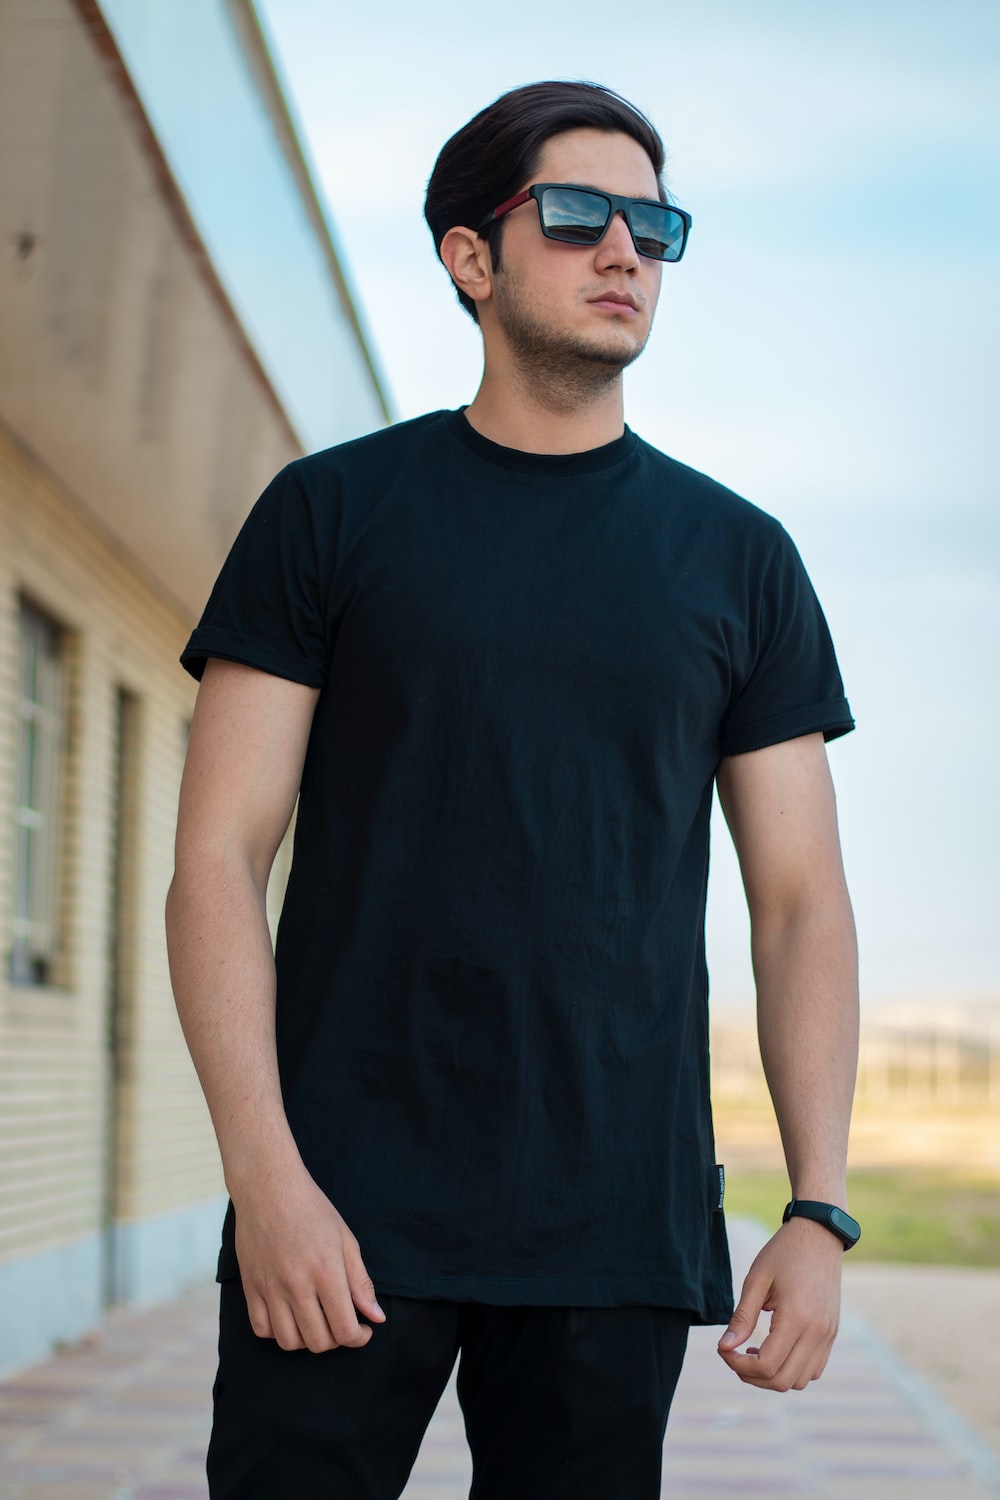

In [0]:
from PIL import Image
import requests
#img_url = "https://www.jcrew.com/s7-img-facade/AS211_RD5697_m?hei=850&crop=0,0,680,0"
img_url = "https://images.unsplash.com/photo-1618517351616-38fb9c5210c6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8bWFuJTIwdCUyMHNoaXJ0fGVufDB8fDB8fHww&w=1000&q=80"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
display(raw_image)

In [0]:
model_finetuned = PeftModel.from_pretrained(model, '/dbfs/FileStore/shared_uploads/avinash.sooriyarachchi@databricks.com/fashion_model_30_epoch/10')


In [0]:
inputs = processor(raw_image,return_tensors="pt").to('cuda', torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=150)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Black Regular Tee
